In [82]:
import json
from datetime import datetime
import os, json
import pandas as pd
import numpy as np
import glob
import time
import re
from glob2 import glob
import emoji
import jsonlines

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
from pylab import mpl
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.corpus import stopwords
import collections
import nltk
from nltk.corpus import wordnet

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import collections

from nltk.tokenize import word_tokenize


from nltk.tokenize import word_tokenize, sent_tokenize

In [83]:
def read_Data(data_file, data_json, label_df):
    # open train.txt
    with open(data_file) as f:
        lines = f.readlines()
    
    jsonFiles = glob(data_json + '/*.json')
    
    # extract tweet ids from train_data.json names
    regex = re.compile('[0-9]{12,22}')
    json_lst = []
    for j in jsonFiles:   
        b=regex.findall(j)
        json_lst.append(b)
    
    data_list = {}
    num = 0
    
            
    
    for i in range(len(lines)):
#     for i in range(500):
        tweets = lines[i].strip('\n').split(',')

        if [tweets[0]] in json_lst:
            target_tweet = {}
            retweets = []
            
            
            for j in range(len(tweets)):
                filePath = data_json+tweets[j]+'.json'
                if j == 0 :
                    json_data_file = open(filePath,'r').read()
                    json_data = json.loads(json_data_file)
                    
                    tweet_id = json_data['id_str']
                    target_tweet['label'] = label_df.loc[label_df['id'] == tweet_id]['prediction'][0]
                    
                    target_tweet['source tweet id']=json_data['id_str']
                    target_tweet['source tweet text']=json_data['text']
                    create_time =  json_data["created_at"].split(" ")
                    target_tweet['created at'] = create_time[2] + ' ' + create_time[1] +" "+ create_time[-1]
#                     target_tweet['create time'] = time.strptime(json_data['created_at'],'%a %b %d %H:%M:%S %z %Y')
                if j!=0 and [tweets[j]] in json_lst:
                    json_data_file = open(filePath,'r').read()
                    json_data = json.loads(json_data_file)
                    
                    ### list the retweets in a chronongical order
                    retweets.append((time.strptime(json_data['created_at'],'%a %b %d %H:%M:%S %z %Y'), json_data['text']))
                    sort_time_retweets = sorted(retweets, key=lambda x: x[0])
                    sort_retweets = [t[1] for t in sort_time_retweets]
                    target_tweet['retweets']=sort_retweets

            data_list[num] = target_tweet
            num += 1
#         elif label_df:
#             labels[i] = 2
            
#     labels = list(filter((2).__ne__, labels))
        
    return data_list

In [84]:
# covid_data_json = 'covid-data/'
# covid_data_file = 'covid.data.txt'
# covid_label_file = 'covid_prediction.json'

In [85]:
# covid_label = open(covid_label_file, 'r').read()
# covid_label_data  = json.loads(covid_label)
# covid_label_df = pd.DataFrame(covid_label_data).T
# covid_label_df['prediction'].replace(1,'rumour', inplace=True)
# covid_label_df['prediction'].replace(0,'nonrumour', inplace=True)

In [86]:

covid_data_d=read_Data(covid_data_file,covid_data_json,covid_label_df)
covid_df = pd.DataFrame(covid_data_d).T

,id,prediction
0,1272262651100434433,rumour
1,1287153210990395392,nonrumour
2,1266555444283179008,nonrumour
3,1274338812173393920,rumour
4,1278703879828303877,nonrumour
...,...,...
15967,1249502859185590272,rumour
15968,1284050414619459586,nonrumour
15969,1274505289614725122,rumour
15970,1267884642637676545,nonrumour


In [ ]:
# covid_df.to_csv(r'total_covid_data.csv', index=False)

In [99]:
covid_df = pd.read_csv('total_covid_data.csv')

In [100]:
covid_df=covid_df.drop(['Unnamed: 0'],axis = 1)

In [101]:
# covid_data_file = open(jsonFiles[0], 'r').read() # r for reading the file
# covid_data = json.loads(covid_data_file)
# covid_data

In [102]:
def clean_tweet(text):
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#', '', text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove URL, RT, mention(@)
    text = re.sub(r'http(\S)+', '', text)
    text = re.sub(r'http ...', '', text)
    text = re.sub(r'(RT|rt)[ ]*@[ ]*[\S]+', '', text)
    text = re.sub(r'RT[ ]?@', '', text)
    text = re.sub(r'@[\S]+', '', text)

    text = re.sub(r'&amp;?', 'and', text)
    text = re.sub(r'&lt;', '<', text)
    text = re.sub(r'&gt;', '>', text)

    # Remove emoji
    text = emoji.demojize(text)

    # Remove redundent whitespace (including new line characters)
    text = re.sub(r'\s\s+', '', text)
    text = re.sub(r'[ ]{2, }', '', text)

    return text

In [103]:
covid_df['source tweet text'] = covid_df['source tweet text'].apply(lambda text:clean_tweet(text))

covid_df

,label,source tweet id,source tweet text,created at,retweets
0,rumour,1272262651100434433,"According to the New York Times, Warner Bros. ...",14 Jun 2020,NaN
1,nonrumour,1287153210990395392,Hurricane Hanna has made landfall in Texas.The...,25 Jul 2020,['@TexasTribune Guess what the cause of death ...
2,nonrumour,1266555444283179008,Monkeys on the loose in India with stolen coro...,30 May 2020,NaN
3,rumour,1274338812173393920,"“If Trump felt comfortable having it here, the...",20 Jun 2020,['@HeidiNBC These Trump fans have a right to a...
4,nonrumour,1278703879828303877,DISTURBING: Alabama officials say some student...,02 Jul 2020,NaN
...,...,...,...,...,...
15967,rumour,1249502859185590272,I wonder how many lives could’ve been saved if...,13 Apr 2020,['@funder Wonder how many lives could have bee...
15968,nonrumour,1284050414619459586,Thefront page on 17th March. The first line re...,17 Jul 2020,"[""@NadineDorries @thetimes Inadequate supplies..."
15969,rumour,1274505289614725122,Trump just completed the racism trifecta in a ...,21 Jun 2020,['@DNCWarRoom Fact check: Chinese is not a rac...
15970,nonrumour,1267884642637676545,Here are a few of my photographs from today’s ...,02 Jun 2020,['@Jess__Taylor__ @davidallengreen Eck! What a...


In [93]:
covid_rumour_df = covid_df[covid_df['label']=='rumour']
covid_rumour_df

,label,source tweet id,source tweet text,created at,retweets
0,rumour,1272262651100434433,"According to the New York Times, Warner Bros. ...",14 Jun 2020,NaN
3,rumour,1274338812173393920,"“If Trump felt comfortable having it here, the...",20 Jun 2020,['@HeidiNBC These Trump fans have a right to a...
6,rumour,1274091468890632192,KHive has become the most toxic thing on Twitt...,19 Jun 2020,"[""@JasonOverstreet It wasn't enough that Warre..."
15,rumour,1262904939086516225,America has made incredible strides despite wh...,20 May 2020,['@WhiteHouse Deaths from new coronavirus are ...
20,rumour,1275965523625418753,Trump has royally fucked up this country.,25 Jun 2020,"['@StephenKing With a little bit of luck, in J..."
...,...,...,...,...,...
15948,rumour,1272694147468623872,"Trump on coronavirus: ""If we stop testing righ...",16 Jun 2020,"['@thehill Donald Trump\u2069, in a meeting at..."
15958,rumour,1253754919217233920,Revealed: leader of group peddling bleach as c...,24 Apr 2020,"[""@guardian Hmm, I've heard hard radiation kil..."
15967,rumour,1249502859185590272,I wonder how many lives could’ve been saved if...,13 Apr 2020,['@funder Wonder how many lives could have bee...
15969,rumour,1274505289614725122,Trump just completed the racism trifecta in a ...,21 Jun 2020,['@DNCWarRoom Fact check: Chinese is not a rac...


In [94]:
covid_nonrumour_df = covid_df[covid_df['label']=='nonrumour']
covid_nonrumour_df

,label,source tweet id,source tweet text,created at,retweets
1,nonrumour,1287153210990395392,Hurricane Hanna has made landfall in Texas.The...,25 Jul 2020,['@TexasTribune Guess what the cause of death ...
2,nonrumour,1266555444283179008,Monkeys on the loose in India with stolen coro...,30 May 2020,NaN
4,nonrumour,1278703879828303877,DISTURBING: Alabama officials say some student...,02 Jul 2020,NaN
5,nonrumour,1249421782630772746,Today I’m thinking about the families across o...,12 Apr 2020,['@KamalaHarris Trump ignored Bush43’s 2005 pa...
7,nonrumour,1278159404324405248,Major League Soccer COVID-19 Testing Update - ...,01 Jul 2020,NaN
...,...,...,...,...,...
15964,nonrumour,1249852279970201600,Our friends athave unleashed their new COVID t...,14 Apr 2020,NaN
15965,nonrumour,1243807211815649285,:face_with_tears_of_joy::face_with_tears_of_jo...,28 Mar 2020,NaN
15966,nonrumour,1255750009330548737,Los Angeles is offering free coronavirus testi...,30 Apr 2020,NaN
15968,nonrumour,1284050414619459586,Thefront page on 17th March. The first line re...,17 Jul 2020,"[""@NadineDorries @thetimes Inadequate supplies..."


In [104]:
rumour_tweet = ''
for tweet in covid_rumour_df['source tweet text']:
    rumour_tweet += tweet
    
    

In [96]:
nonrumour_tweet = ''
for tweet in covid_nonrumour_df['source tweet text']:
    nonrumour_tweet += tweet
    

In [105]:
from nltk.corpus import stopwords
import collections
import nltk
from nltk.corpus import wordnet

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
words = set(nltk.corpus.words.words()) #a list of words provided by NLTK
words = set([ word.lower() for word in words ]) #lowercase all the words for better matching


stopwords = set(stopwords.words('english')) #note: stopwords are all in lowercase
a=ord('a')
alph=[chr(i) for i in range(a,a+26)]



def lemmatize(word):
    lemma = lemmatizer.lemmatize(word,'v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word,'n')
    return lemma


def tokenizer_tweet(tweets):
    tt = TweetTokenizer()
    tweet_tokens = tt.tokenize(tweets)
    result_token = []
    for token in tweet_tokens:
        if not token.lower() in stopwords and set(list(token.lower())).intersection(set(alph)):
            result_token.append(token.lower())
    return result_token



In [106]:
rumour_token = tokenizer_tweet(rumour_tweet)
rumour_counter = collections.Counter(rumour_token)
rumour_counter.most_common(20)

[('coronavirus', 1190),
 ('trump', 1107),
 ('president', 429),
 ('covid', 365),
 ('says', 233),
 ('people', 186),
 ('new', 166),
 ('donald', 128),
 ('china', 128),
 ('americans', 119),
 ('breaking', 117),
 ("trump's", 112),
 ('said', 111),
 ('news', 107),
 ('us', 105),
 ('house', 96),
 ('one', 89),
 ('death', 87),
 ('white', 87),
 ('deaths', 85)]

In [107]:


# stop_words = set(stopwords.words('english'))
 

# txt = "Sukanya, Rajib and Naba are my good friends. " \
#     "Sukanya is getting married next year. " \
#     "Marriage is a big step in one’s life." \
#     "It is both exciting and frightening. " \
#     "But friendship is a sacred bond between people." \
#     "It is a special kind of love between us. " \
#     "Many of you must have tried searching for a friend "\
#     "but never found the right one."
# # sent_tokenize is one of instances of
# # PunktSentenceTokenizer from the nltk.tokenize.punkt module
 
# # tokenized = sent_tokenize(txt)
# # for i in tokenized:
     
#     # Word tokenizers is used to find the words
#     # and punctuation in a string
# wordsList = nltk.word_tokenize(txt)
# print(wordsList)
# # removing stop words from wordList
# #     wordsList = [w for w in wordsList if not w in stop_words]

# #  Using a Tagger. Which is part-of-speech
# # tagger or POS-tagger.
# tagged = nltk.pos_tag(wordsList)

# print(tagged)

# Q1 rumour and non-rumour topics

In [109]:


lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
words = set(nltk.corpus.words.words()) #a list of words provided by NLTK
words = set([ word.lower() for word in words ]) #lowercase all the words for better matching


# stopwords_set = set(stopwords.words('english')) #note: stopwords are all in lowercase
a=ord('a')
alph=[chr(i) for i in range(a,a+26)]

tt = TweetTokenizer()

def lemmatize(word):
    lemma = lemmatizer.lemmatize(word,'v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word,'n')
    return lemma


def tokenizer_tweetdf_get_NN(data_df):
    
    result_token = []
    tweet_lst = data_df['source tweet text'].tolist()
    for i in range(len(tweet_lst)):
        tweet = tweet_lst[i]
        sentence_tokenized = sent_tokenize(tweet)
        for sentence in sentence_tokenized:
            word_token = tt.tokenize(sentence)
            tagged = nltk.pos_tag(word_token)

            for word, tag in nltk.pos_tag(word_token):
    #             print(word, tag)
                if tag.startswith('NN') and not word.lower() in stopwords_set and set(list(word.lower())).intersection(set(alph)):
                    word = word.split("'")[0]
                    
                    lem_word = lemmatize(word.lower())
                    if len(lem_word)!=1 and lem_word != 'new':
                        result_token.append(lem_word)

        
    
    return result_token
    



In [110]:
rumour_token = tokenizer_tweetdf_get_NN(covid_rumour_df )


In [111]:
rumour_counter = collections.Counter(rumour_token)
rumour_counter.most_common(30)

[('trump', 1223),
 ('coronavirus', 1090),
 ('president', 448),
 ('covid', 341),
 ('people', 189),
 ('death', 173),
 ('china', 142),
 ('donald', 131),
 ('american', 131),
 ('break', 112),
 ('news', 108),
 ('house', 100),
 ('time', 91),
 ('rally', 87),
 ('state', 86),
 ('bill', 84),
 ('white', 83),
 ('response', 78),
 ('biden', 72),
 ('america', 70),
 ('day', 70),
 ('medium', 68),
 ('campaign', 68),
 ('week', 67),
 ('case', 67),
 ('crisis', 65),
 ('world', 65),
 ('flu', 60),
 ('democrat', 60),
 ('cuomo', 59)]

In [112]:
rumor_df_c = pd.DataFrame(rumour_counter.most_common(20))
rumor_df_c

,0,1
0,trump,1223
1,coronavirus,1090
2,president,448
3,covid,341
4,people,189
5,death,173
6,china,142
7,donald,131
8,american,131
9,break,112


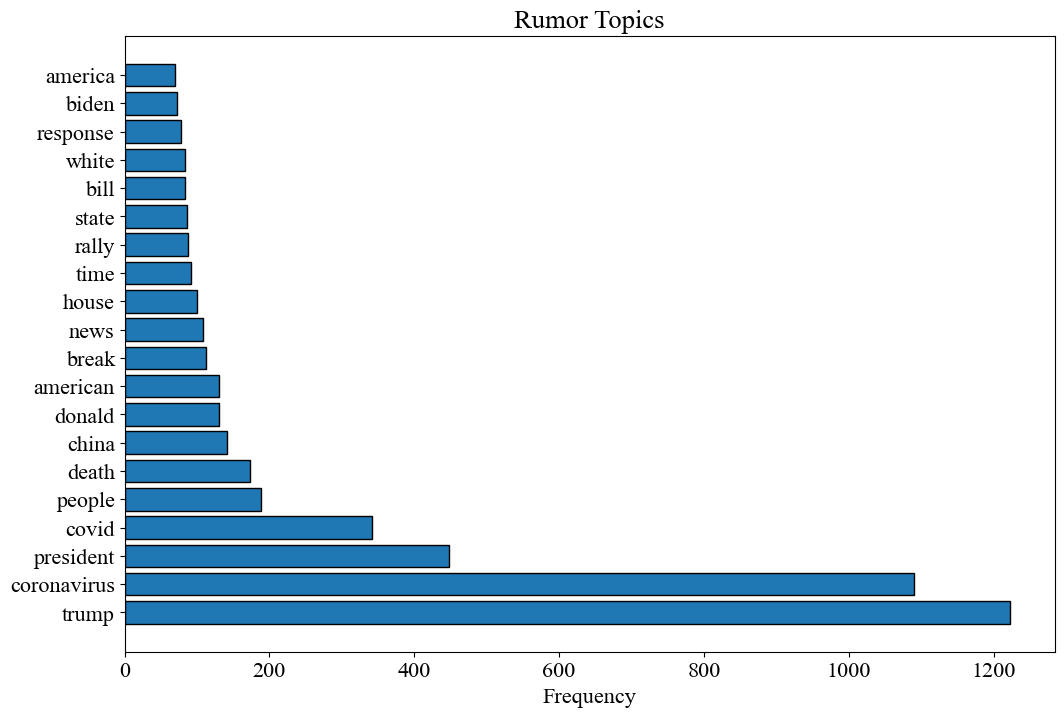

In [120]:
plt.rc('font',family='Times New Roman') 
mpl.rcParams['font.size']=16
plt.figure(figsize=(12,8),dpi=100)
plt.barh(rumor_df_c[0],rumor_df_c[1], edgecolor='black')

plt.tick_params(labelsize=16)  
plt.title("Rumor Topics")
plt.xlabel('Frequency')

plt.show()   

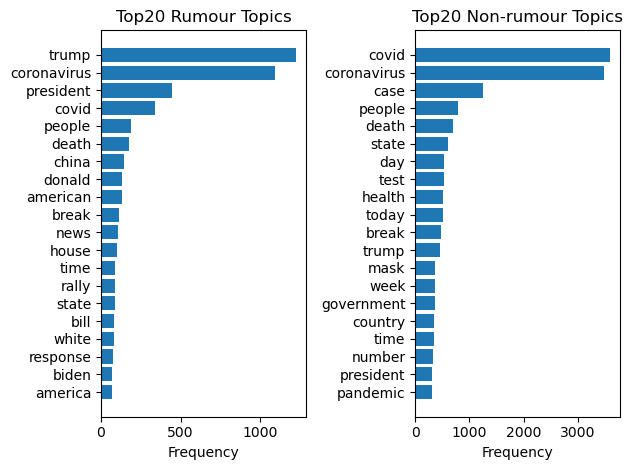

In [122]:
plt.rcdefaults()
fig, axs = plt.subplots(1, 2, tight_layout=True)

y_pos = np.arange(len(rumor_df_c[1]))
axs[0].barh(rumor_df_c[0], rumor_df_c[1])#, xerr=error, align='center'
# axs[0].set_yticks(rumor_df_c[0], labels=rumor_df_c[1])
axs[0].invert_yaxis()  # labels read top-to-bottom
axs[0].set_xlabel('Frequency')
axs[0].set_title('Top20 Rumour Topics')

y_pos = np.arange(len(nonrumor_df_c[1]))
axs[1].barh(nonrumor_df_c[0], nonrumor_df_c[1])#, xerr=error, align='center'
# axs[1].set_yticks(y_pos, labels=hashtags_top_k_nr)
axs[1].invert_yaxis()  # labels read top-to-bottom
axs[1].set_xlabel('Frequency')
axs[1].set_title('Top20 Non-rumour Topics')

plt.savefig("../Top20 rumour and nonrumour topics.png", bbox_inches="tight")
plt.show()

In [123]:
nonrumour_token = tokenizer_tweetdf_get_NN(covid_nonrumour_df)

In [116]:
nonrumour_counter = collections.Counter(nonrumour_token)
nonrumour_counter.most_common(40)

[('covid', 3597),
 ('coronavirus', 3485),
 ('case', 1244),
 ('people', 795),
 ('death', 700),
 ('state', 603),
 ('day', 537),
 ('test', 523),
 ('health', 521),
 ('today', 509),
 ('break', 482),
 ('trump', 465),
 ('mask', 371),
 ('week', 362),
 ('government', 362),
 ('country', 346),
 ('time', 342),
 ('number', 333),
 ('president', 306),
 ('pandemic', 303),
 ('patient', 281),
 ('world', 280),
 ('china', 268),
 ('uk', 264),
 ('home', 264),
 ('hospital', 262),
 ('house', 258),
 ('news', 255),
 ('florida', 236),
 ('dr', 234),
 ('american', 216),
 ('report', 207),
 ('worker', 205),
 ('virus', 203),
 ('response', 192),
 ('crisis', 187),
 ('spread', 187),
 ('vaccine', 186),
 ('lockdown', 186),
 ('outbreak', 183)]

In [117]:
nonrumor_df_c = pd.DataFrame(nonrumour_counter.most_common(20))

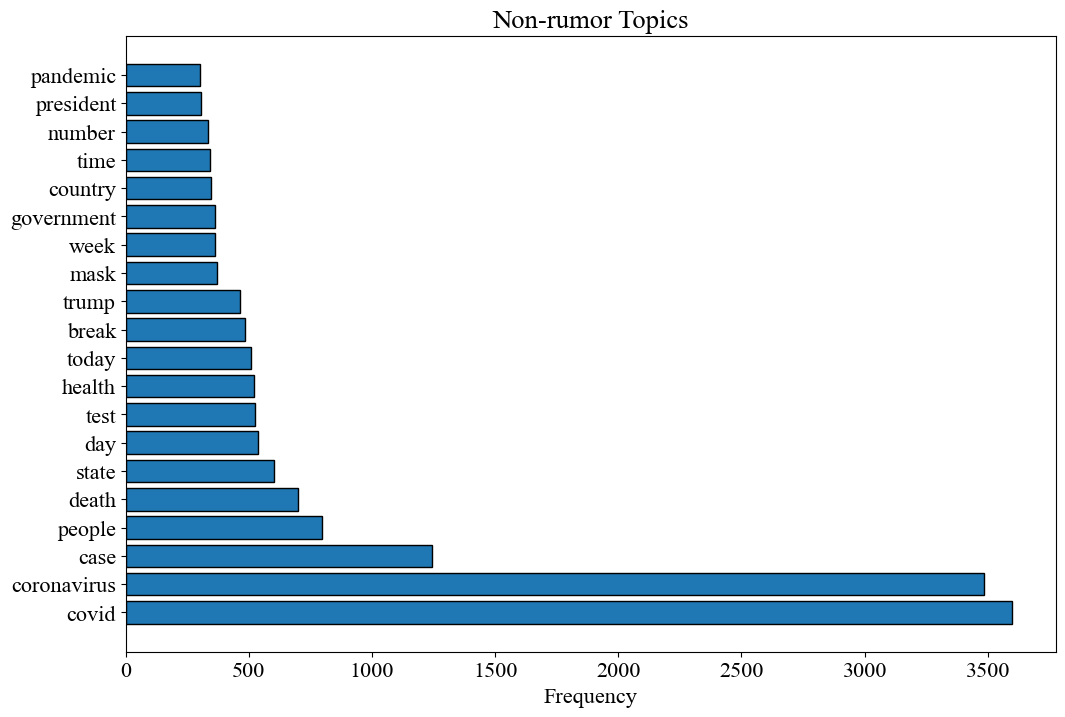

In [118]:
plt.rc('font',family='Times New Roman') 
mpl.rcParams['font.size']=16
plt.figure(figsize=(12,8),dpi=100)
plt.barh(nonrumor_df_c[0],nonrumor_df_c[1], edgecolor='black')

plt.tick_params(labelsize=16)
plt.title("Non-rumor Topics")
plt.xlabel('Frequency')
plt.show()   

# Q2 how do COVID-19 rumour topics or trends evolve over time?

In [124]:
rumour_time_df = covid_rumour_df[['created at','source tweet text']]
rumour_time_df['created at'] = pd.to_datetime(covid_rumour_df['created at'])

<ipython-input-124-ac56dd9b789a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumour_time_df['created at'] = pd.to_datetime(covid_rumour_df['created at'])


In [125]:
rumour_time_df

,created at,source tweet text
0,2020-06-14,"According to the New York Times, Warner Bros. ..."
3,2020-06-20,"“If Trump felt comfortable having it here, the..."
6,2020-06-19,KHive has become the most toxic thing on Twitt...
15,2020-05-20,America has made incredible strides despite wh...
20,2020-06-25,Trump has royally fucked up this country.
...,...,...
15948,2020-06-16,"Trump on coronavirus: ""If we stop testing righ..."
15958,2020-04-24,Revealed: leader of group peddling bleach as c...
15967,2020-04-13,I wonder how many lives could’ve been saved if...
15969,2020-06-21,Trump just completed the racism trifecta in a ...


In [126]:
rumour_time_df=rumour_time_df.set_index('created at')

In [127]:
rumour_time_ts = rumour_time_df.squeeze()
rumour_sum = rumour_time_ts.resample('M').sum()
rumour_sum

created at
2020-01-31    CNN International: Authorities in Beijing have...
2020-02-29    Somewhere in Wuhan, three unknown people are w...
2020-03-31    Prediction: Hunter Biden will return to the Tr...
2020-04-30    One month ago tomorrow in NYT: "Right-Wing Med...
2020-05-31    Trump says he has seen evidence coronavirus ca...
2020-06-30    "The racial discrimination against minorities ...
2020-07-31    July is stacked :star-struck::black_small_squa...
2020-08-31    McConnell says more than a third of Republican...
Freq: M, Name: source tweet text, dtype: object

In [128]:
rumour_index=rumour_sum.index
# a_str = a.strftime('%Y-%m')
# a_str

In [129]:
def tokenizer_tweet_get_NN(tweets):
    
    result_token = []

    sentence_tokenized = sent_tokenize(tweets)
    for sentence in sentence_tokenized:
        word_token = tt.tokenize(sentence)
        tagged = nltk.pos_tag(word_token)

        for word, tag in nltk.pos_tag(word_token):
#             print(word, tag)
            if tag.startswith('NN') and not word.lower() in stopwords and set(list(word.lower())).intersection(set(alph)):
                word = word.split("'")[0]
                word = word.split('.')
                for w in word:
                    if len(w)!=1:
                        lem_word = lemmatize(w)
                        result_token.append(lem_word.lower())

    result_counter = collections.Counter(result_token)
    
    return result_counter
    

In [130]:
rumour_jan = rumour_sum['2020-01'][0]
rumour_topic_jan = tokenizer_tweet_get_NN(rumour_jan).most_common(10)

In [131]:
rumour_feb = rumour_sum['2020-02'][0]
rumour_topic_feb = tokenizer_tweet_get_NN(rumour_feb).most_common(10)
rumour_topic_feb

[('coronavirus', 35),
 ('trump', 27),
 ('china', 8),
 ('president', 8),
 ('administration', 6),
 ('mike', 5),
 ('wuhan', 4),
 ('people', 4),
 ('cdc', 4),
 ('pence', 4)]

In [132]:
months = ["Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug"]
rumour_topic_counter = []
for i in range(len(rumour_sum)):
    rumour_month = rumour_sum[i]
    rumour_counter = tokenizer_tweet_get_NN(rumour_month).most_common(10)
    rumour_topic_counter.append(rumour_counter)

rumour_topic_counter

[[('coronavirus', 5),
  ('breaking', 2),
  ('people', 2),
  ('wuhan', 2),
  ('worry', 2),
  ('flu', 2),
  ('duterte', 2),
  ('china', 2),
  ('cnn', 1),
  ('international', 1)],
 [('coronavirus', 35),
  ('trump', 27),
  ('china', 8),
  ('president', 8),
  ('administration', 6),
  ('mike', 5),
  ('wuhan', 4),
  ('people', 4),
  ('cdc', 4),
  ('pence', 4)],
 [('coronavirus', 233),
  ('trump', 180),
  ('president', 65),
  ('covid', 31),
  ('people', 26),
  ('house', 21),
  ('new', 20),
  ('death', 18),
  ('white', 16),
  ('americans', 15)],
 [('trump', 329),
  ('coronavirus', 329),
  ('president', 126),
  ('covid', 87),
  ('china', 60),
  ('people', 58),
  ('death', 47),
  ('americans', 40),
  ('donald', 40),
  ('time', 38)],
 [('trump', 309),
  ('coronavirus', 231),
  ('president', 105),
  ('covid', 77),
  ('death', 60),
  ('people', 49),
  ('china', 37),
  ('house', 35),
  ('new', 32),
  ('donald', 31)],
 [('trump', 236),
  ('coronavirus', 149),
  ('president', 95),
  ('covid', 86),
  ('

In [133]:
rumour_topic_d = {}
for i in range(len(rumour_index)):
    index = rumour_index[i].strftime('%Y-%m')
    rumour_topic_d[index] = rumour_topic_counter[i]
 


In [134]:
rumour_topic_df = pd.DataFrame(rumour_topic_d)
rumour_topic_df

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
0,"(coronavirus, 5)","(coronavirus, 35)","(coronavirus, 233)","(trump, 329)","(trump, 309)","(trump, 236)","(trump, 132)","(coronavirus, 3)"
1,"(breaking, 2)","(trump, 27)","(trump, 180)","(coronavirus, 329)","(coronavirus, 231)","(coronavirus, 149)","(coronavirus, 88)","(covid, 3)"
2,"(people, 2)","(china, 8)","(president, 65)","(president, 126)","(president, 105)","(president, 95)","(covid, 54)","(mcconnell, 2)"
3,"(wuhan, 2)","(president, 8)","(covid, 31)","(covid, 87)","(covid, 77)","(covid, 86)","(president, 41)","(senator, 2)"
4,"(worry, 2)","(administration, 6)","(people, 26)","(china, 60)","(death, 60)","(rally, 70)","(death, 26)","(relief, 2)"
5,"(flu, 2)","(mike, 5)","(house, 21)","(people, 58)","(people, 49)","(people, 38)","(donald, 25)","(package, 2)"
6,"(duterte, 2)","(wuhan, 4)","(new, 20)","(death, 47)","(china, 37)","(tulsa, 36)","(cain, 18)","(trump, 2)"
7,"(china, 2)","(people, 4)","(death, 18)","(americans, 40)","(house, 35)","(campaign, 29)","(biden, 17)","(grandma, 1)"
8,"(cnn, 1)","(cdc, 4)","(white, 16)","(donald, 40)","(new, 32)","(death, 26)","(herman, 17)","(hospital, 1)"
9,"(international, 1)","(pence, 4)","(americans, 15)","(time, 38)","(donald, 31)","(case, 24)","(case, 16)","(coma, 1)"
